<a href="https://colab.research.google.com/github/nateandrews/nathan_andrews_project_2/blob/main/AER850Project2_Steps1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         541,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 547,395 (2.09 MB)

 Trainable params: 547,395 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 517ms/step - accuracy: 0.3402 - loss: 1.1035 - val_accuracy: 0.4060 - val_loss: 1.0745
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 505ms/step - accuracy: 0.3568 - loss: 1.0691 - val_accuracy: 0.4130 - val_loss: 1.0500
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 500ms/step - accuracy: 0.4900 - loss: 0.9978 - val_accuracy: 0.4803 - val_loss: 1.0363
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 499ms/step - accuracy: 0.6147 - loss: 0.9353 - val_accuracy: 0.5777 - val_loss: 0.9593
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 499ms/step - accuracy: 0.6391 - loss: 0.8609 - val_accuracy: 0.6172 - val_loss: 0.9051
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 508ms/step - accuracy: 0.6836 - loss: 0.7939 - val_accuracy: 0.6265 - val_loss: 0.8469
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 513ms/step - accuracy: 0.6729 - loss: 0.7390 - val_accuracy: 0.6798 - val_loss: 0.8378
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 505ms/step - accuracy: 0.7064 - loss: 0.7043 - val_accu

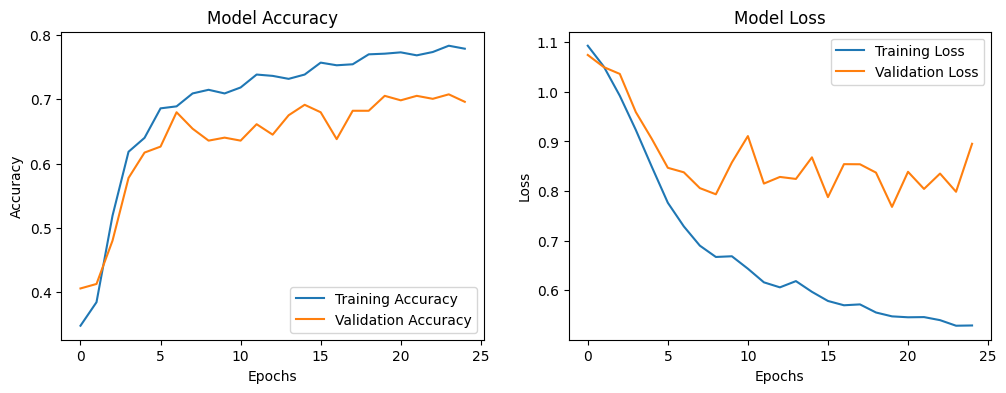

Model saved as '/content/drive/MyDrive/850 Project 2 Data/model.keras'


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#defining image size and batch size
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

#defining paths
train_dir = '/content/drive/MyDrive/850 Project 2 Data/nathan_andrews_project_2-main/Data/train'
val_dir = '/content/drive/MyDrive/850 Project 2 Data/nathan_andrews_project_2-main/Data/valid'
test_dir = '/content/drive/MyDrive/850 Project 2 Data/nathan_andrews_project_2-main/Data/test'

#data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

#creating data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

#Step 2 and 3 - Neural Network Architecture Design and Hyperparameter Analysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#building model with input layer
model = Sequential([
    Input(shape=(100, 100, 3)),

    #convolutional layers with batch normalization
    Conv2D(16,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    #flattened and connected layers
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(16,activation = 'relu'),

    #output layer
    Dense(3, activation = 'softmax')
])

model.summary()

#compiling model with smaller learning rate
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

#step 4 - Model Evaluation
import matplotlib.pyplot as plt

#training model with callbacks
history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = validation_generator,
)

model.save('model.keras')
print("Model saved as model.keras")

#plotting the accuracy and loss
plt.figure(figsize=(12,4))

#plotting accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

#plotting loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

model_save_path = '/content/drive/MyDrive/850 Project 2 Data/model.keras'
model.save(model_save_path)
print(f"Model saved as '{model_save_path}'")